In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
data=pd.read_csv('advertising.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


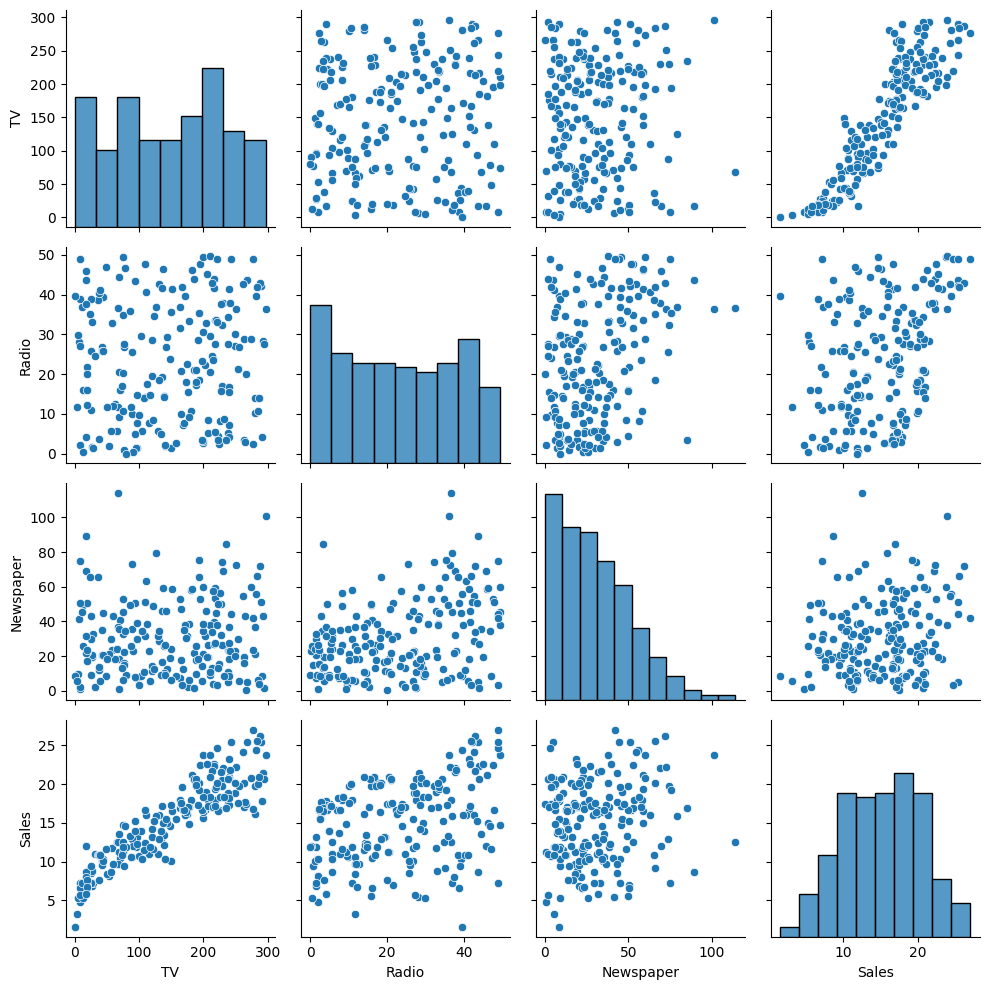

In [4]:
sns.pairplot(data)
plt.tight_layout()
plt.show()

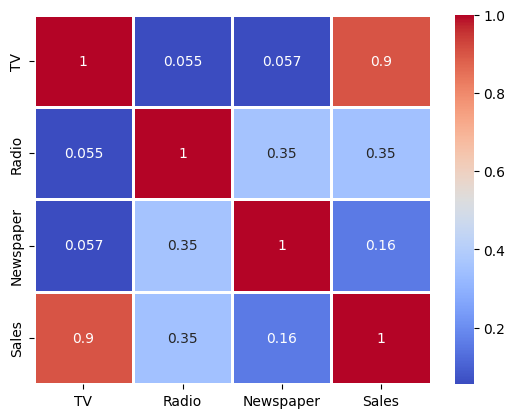

In [5]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',linewidth=2)
plt.show()

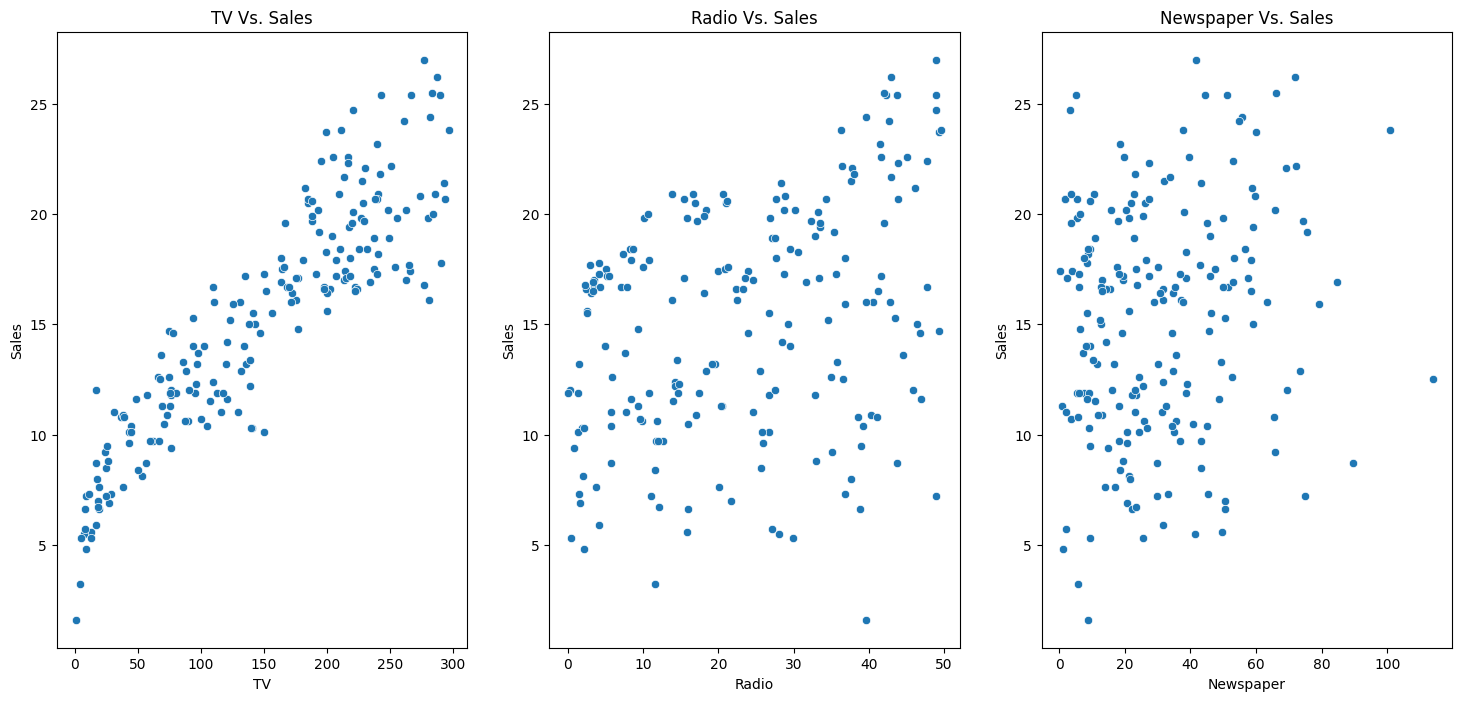

In [6]:
fig,ax=plt.subplots(1,3,figsize=(18,8))
sns.scatterplot(data=data,x='TV',y='Sales',ax=ax[0])
ax[0].set_title('TV Vs. Sales')
sns.scatterplot(data=data,x='Radio',y='Sales',ax=ax[1])
ax[1].set_title('Radio Vs. Sales')
sns.scatterplot(data=data,x='Newspaper',y='Sales',ax=ax[2])
ax[2].set_title('Newspaper Vs. Sales')
plt.show()

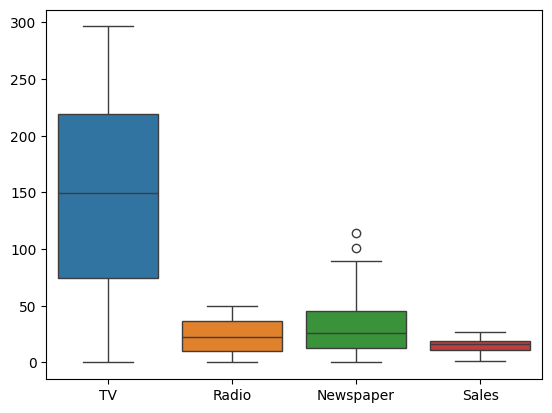

In [7]:
sns.boxplot(data)
plt.show()

In [8]:
X=data.drop('Sales',axis=1)
Y=data['Sales']

In [9]:
!pip install statsmodels

In [10]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [11]:
import statsmodels.api as sm
X_const=sm.add_constant(X) 
model=sm.OLS(Y,X_const).fit()
predictions=model.predict(X_const)
residuals=model.resid
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           8.13e-99
Time:                        20:36:53   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squared - 90.3% of variance in sales is explained by my model very clearly Adj R-Squared - 90.1% - no. of predictors with different sample sizes can be effectively predicted and also it is used check the model is overfitting or not F-statistics :605.4 and p-value:<0.05 statistcally significant model Sales=4.6251+0.0544TV+0.1070Radio+0.0003*Newspaper The t-statistics should be higher and p-vale<0.05 to choose the feature ie) the feature is statistically significant to predict sales Therefor TV and Radio are statistically significant Newspaper is not statistically significant Model Diagnostics:

Omnibus and Jaquar Berra: Residulas are not normally distributed
Durbin Watson value:2.25 check autocorrelation =2 no autocorrelation <2 +ve autocorrelation
2 -ve autocorrelation There is no autocorrelation since the value is closer to 2 cond.No.:454 30 multicollinearity

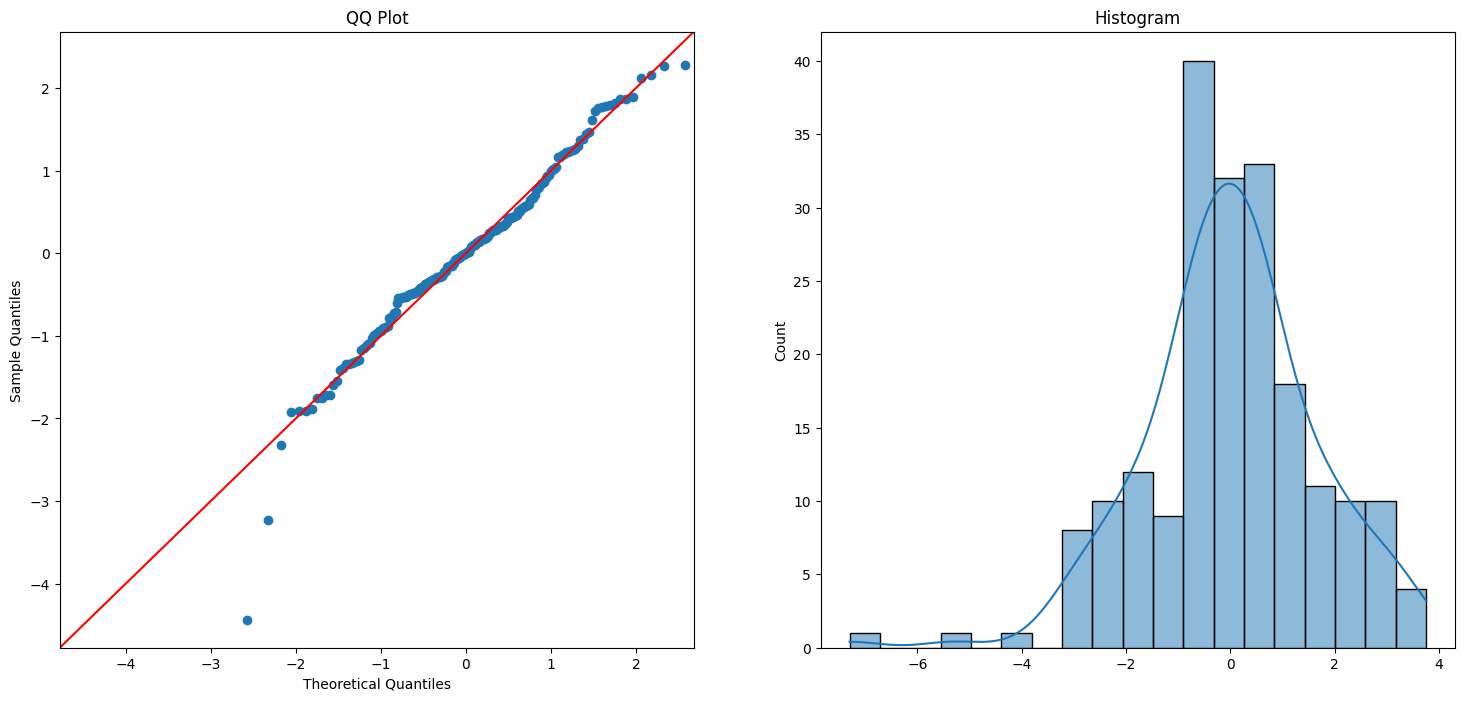

In [13]:
#normality plot
fig,ax=plt.subplots(1,2,figsize=(18,8))
sm.qqplot(residuals,line='45',fit=True,ax=ax[0])
ax[0].set_title('QQ Plot')
sns.histplot(residuals,kde=True,ax=ax[1])
ax[1].set_title('Histogram')
plt.show()

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [18]:
model_lin=LinearRegression()
model_lin.fit(X_train,Y_train)
y_pred=model_lin.predict(X_test) 

In [19]:
model_lin.intercept_

np.float64(4.714126402214127)

In [20]:
model_lin.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [21]:
r2=r2_score(Y_test,y_pred)
print('R Squared is',r2)
mse=mean_squared_error(Y_test,y_pred)
print('MSE',mse)
mae=mean_absolute_error(Y_test,y_pred)
print('MAE',mae)

R Squared is 0.9059011844150826
MSE 2.9077569102710896
MAE 1.2748262109549338


In [22]:
rmse=np.sqrt(mse)
print('RMSE',rmse)

RMSE 1.7052146229349223


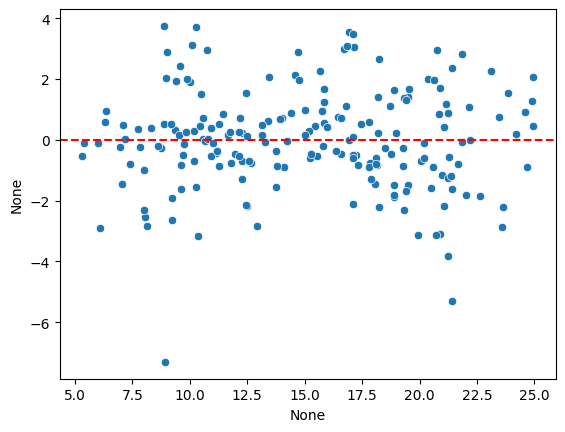

In [23]:
sns.scatterplot(x=predictions,y=residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.show()

In [24]:
#K fold cross validation for limited dataset
from sklearn.model_selection import cross_val_score,cross_val_predict
cv_score=cross_val_score(LinearRegression(),X,Y,cv=5,
                         scoring='neg_mean_squared_error')
#scoreing -> r2 or explained_variance
print(cv_score) # 10 scores
print(cv_score.mean())

[-3.05606897 -2.02676065 -1.85105212 -4.72039259 -2.63694072]
-2.8582430099910106


In [25]:
cv_pred=cross_val_predict(LinearRegression(),X,Y,cv=10)
cv_pred.shape

(200,)

0.9058999159458062
2.907796107367048


<Axes: ylabel='Sales'>

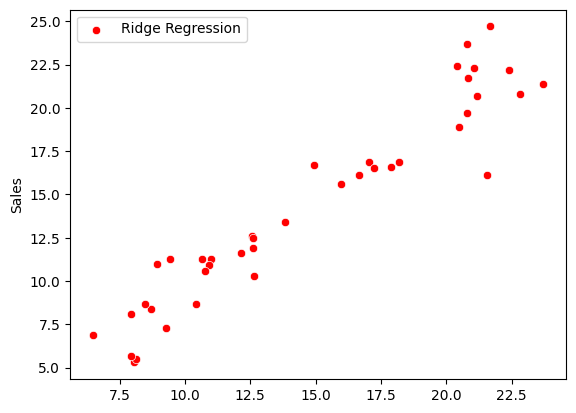

In [26]:
from sklearn.linear_model import Ridge,Lasso
model_ridge=Ridge(alpha=1.0)#multicolinearity
model_ridge.fit(X_train,Y_train)
y_pred_ridge=model_ridge.predict(X_test)
r2=r2_score(Y_test,y_pred_ridge)
print(r2)
mse=mean_squared_error(Y_test,y_pred_ridge)
print(mse)
sns.scatterplot(x=y_pred_ridge,y=Y_test,color='red',label='Ridge Regression')

0.9058967115743171
2.9078951259708705


<Axes: ylabel='Sales'>

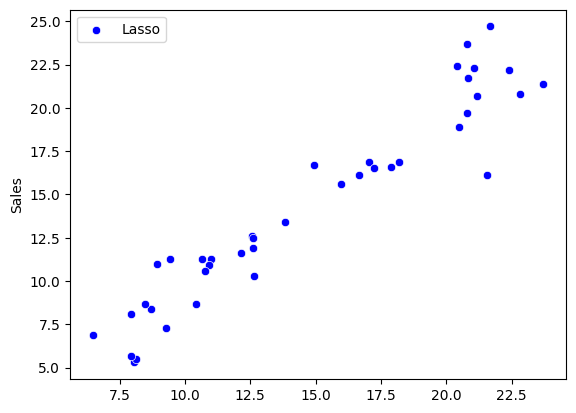

In [27]:
#high dimension data and perform feature selection by penalizing not important feature
#Lasso
model_lasso=Lasso(alpha=0.01)
model_lasso.fit(X_train,Y_train)
y_pred_lasso=model_lasso.predict(X_test)
r2=r2_score(Y_test,y_pred_lasso)
print(r2)
mse=mean_squared_error(Y_test,y_pred_lasso)
print(mse)
sns.scatterplot(x=y_pred_lasso,y=Y_test,color='blue',label='Lasso')

FEATURE SELECTION REGRESSION

In [28]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_regression,RFE

In [32]:
df=pd.read_csv('Admission_Predict.csv')
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 390.8 KB


In [34]:
#clean the column
df.columns=df.columns.str.strip()
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [35]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [36]:
import statsmodels.api as sm
X=df.drop('Chance of Admit',axis=1)
X_const=sm.add_constant(X)
vif_features=pd.DataFrame()
vif_features['features']=X_const.columns
vif_features['VIF']= [variance_inflation_factor(X_const.values,i)
                      for i in range(X_const.shape[1])]
vif_features

,features,VIF
0,const,1533.435012
1,Serial No.,1.087496
2,GRE Score,4.617117
3,TOEFL Score,4.357634
4,University Rating,2.959083
5,SOP,3.113171
6,LOR,2.432982
7,CGPA,5.419519
8,Research,1.543329


In [37]:
from sklearn.model_selection import train_test_split
Y=df['Chance of Admit']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2
                                               ,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(320, 8)
(80, 8)
(320,)
(80,)


In [38]:
from sklearn.linear_model import LinearRegression
#filter method ANOVA
f_score,p_value=f_regression(X_train,Y_train)
#wrapper method
rfe=RFE(LinearRegression(),n_features_to_select=5)
rfe.fit(X_train,Y_train)
features_selected=pd.DataFrame({
    'Features':X_train.columns,
    'F_Score':f_score,
    'P_Value':p_value,
    'RFE Ranking':rfe.ranking_
})
features_selected.sort_values(by='RFE Ranking')

,Features,F_Score,P_Value,RFE Ranking
3,University Rating,336.841085,8.199160e-52,1
2,TOEFL Score,508.463462,6.344140e-68,1
6,CGPA,980.157945,3.782644e-99,1
5,LOR,226.292491,5.341324e-39,1
7,Research,135.906150,2.174883e-26,1
1,GRE Score,578.757756,1.429869e-73,2
4,SOP,263.411578,1.424603e-43,3
0,Serial No.,1.871572,1.722610e-01,4


In [39]:
print(X_train.columns)
print(rfe.support_)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research'],
      dtype='object')
[False False  True  True False  True  True  True]


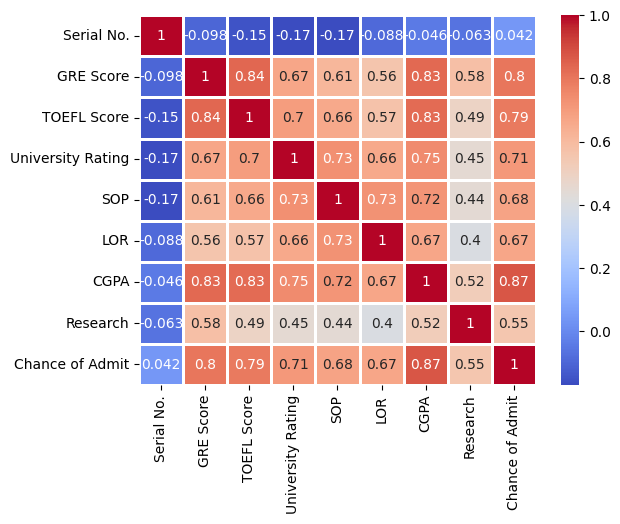

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=1)
plt.show()